# 6.5: Unsupervised Machine Learning: Clustering

### Importing Libraries & Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [9]:
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Data Immersion\Achievement 6\NFL Final Project 2'

In [11]:
df = pd.read_csv(os.path.join(path, 'nfl_geo_spread_analysis.csv'))

In [13]:
df.head()

,Unnamed: 0,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,...,stadium_id,Stadium,home_market,home_name,away_market,away_name,home_division,away_division,home_full_name,away_full_name
0,0,1999_01_MIN_ATL,1999,REG,1,9/12/1999,Sunday,NaN,MIN,17.0,...,ATL00,Georgia Dome,Atlanta,Falcons,Minnesota,Vikings,NFC South,NFC North,Atlanta Falcons,Minnesota Vikings
1,1,1999_01_KC_CHI,1999,REG,1,9/12/1999,Sunday,NaN,KC,17.0,...,CHI98,Soldier Field,Chicago,Bears,Kansas City,Chiefs,NFC North,AFC West,Chicago Bears,Kansas City Chiefs
2,2,1999_01_PIT_CLE,1999,REG,1,9/12/1999,Sunday,NaN,PIT,43.0,...,CLE00,Cleveland Browns Stadium,Cleveland,Browns,Pittsburgh,Steelers,AFC North,AFC North,Cleveland Browns,Pittsburgh Steelers
3,3,1999_01_OAK_GB,1999,REG,1,9/12/1999,Sunday,NaN,OAK,24.0,...,GNB00,Lambeau Field,Green Bay,Packers,Oakland,Raiders,NFC North,AFC West,Green Bay Packers,Oakland Raiders
4,4,1999_01_BUF_IND,1999,REG,1,9/12/1999,Sunday,NaN,BUF,14.0,...,IND99,RCA Dome,Indianapolis,Colts,Buffalo,Bills,AFC South,AFC East,Indianapolis Colts,Buffalo Bills


In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df.shape

(6706, 34)

In [23]:
# Create numerical subset based on numerical columns for knn
numerical_df = df.select_dtypes(include=['number'])

In [25]:
numerical_df

,season,week,away_score,home_score,actual_spread,actual_total,overtime,away_rest,home_rest,projected_spread,projected_total,div_game,temp,wind
0,1999,1,17.0,14.0,-3.0,31.0,0.0,7,7,-4.0,49.0,0,NaN,NaN
1,1999,1,17.0,20.0,3.0,37.0,0.0,7,7,-3.0,38.0,0,80.0,12.0
2,1999,1,43.0,0.0,-43.0,43.0,0.0,7,7,-6.0,37.0,1,78.0,12.0
3,1999,1,24.0,28.0,4.0,52.0,0.0,7,7,9.0,43.0,0,67.0,10.0
4,1999,1,14.0,31.0,17.0,45.0,0.0,7,7,-3.0,45.5,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,2023,20,23.0,31.0,8.0,54.0,0.0,6,7,6.0,49.5,0,NaN,NaN
6702,2023,20,27.0,24.0,-3.0,51.0,0.0,8,6,2.5,45.5,0,25.0,11.0
6703,2023,21,17.0,10.0,-7.0,27.0,0.0,7,8,4.5,44.0,0,47.0,7.0
6704,2023,21,31.0,34.0,3.0,65.0,0.0,7,8,7.5,52.5,0,69.0,5.0


In [27]:
numerical_df.isnull().sum()

season                 0
week                   0
away_score             0
home_score             0
actual_spread          0
actual_total           0
overtime               0
away_rest              0
home_rest              0
projected_spread       0
projected_total        0
div_game               0
temp                1872
wind                1872
dtype: int64

In [37]:
# For knn analysis replace missing values with median
numerical_df['wind'].fillna(numerical_df['wind'].median(), inplace=True)
numerical_df['temp'].fillna(numerical_df['temp'].median(), inplace=True)

C:\Users\gre60\AppData\Local\Temp\ipykernel_13488\4061597530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_df['wind'].fillna(numerical_df['wind'].median(), inplace=True)
C:\Users\gre60\AppData\Local\Temp\ipykernel_13488\4061597530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [39]:
numerical_df.isnull().sum()

season              0
week                0
away_score          0
home_score          0
actual_spread       0
actual_total        0
overtime            0
away_rest           0
home_rest           0
projected_spread    0
projected_total     0
div_game            0
temp                0
wind                0
dtype: int64

### The Elbow Technique

In [42]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [46]:
score = [kmeans[i].fit(numerical_df).score(numerical_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-6719416.588428273,
 -5350119.737825223,
 -4433033.956766865,
 -3915365.4784153723,
 -3477857.6795992698,
 -3226600.4388172524,
 -3070791.4052072433,
 -2885929.66842194,
 -2751082.633445162]

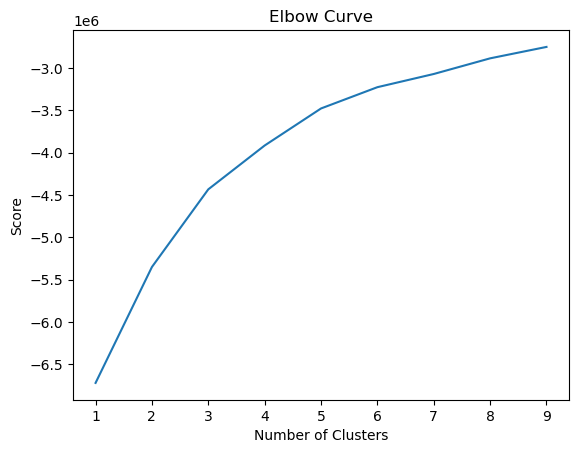

In [48]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Based on the graph the apprpriate number of clusters is 3. Simply because there's a signficant jump from 1 to 3 then the curve starts to striaghten out.

### K-means clustering

In [53]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [55]:
# Fit the k-means object to the data.

kmeans.fit(numerical_df)

KMeans(n_clusters=3)

In [59]:
numerical_df['clusters'] = kmeans.fit_predict(numerical_df)

In [61]:
numerical_df.head()

,season,week,away_score,home_score,actual_spread,actual_total,overtime,away_rest,home_rest,projected_spread,projected_total,div_game,temp,wind,clusters
0,1999,1,17.0,14.0,-3.0,31.0,0.0,7,7,-4.0,49.0,0,59.0,8.0,1
1,1999,1,17.0,20.0,3.0,37.0,0.0,7,7,-3.0,38.0,0,80.0,12.0,1
2,1999,1,43.0,0.0,-43.0,43.0,0.0,7,7,-6.0,37.0,1,78.0,12.0,0
3,1999,1,24.0,28.0,4.0,52.0,0.0,7,7,9.0,43.0,0,67.0,10.0,0
4,1999,1,14.0,31.0,17.0,45.0,0.0,7,7,-3.0,45.5,1,59.0,8.0,2


In [63]:
numerical_df['clusters'].value_counts()

clusters
1    2660
0    2122
2    1924
Name: count, dtype: int64

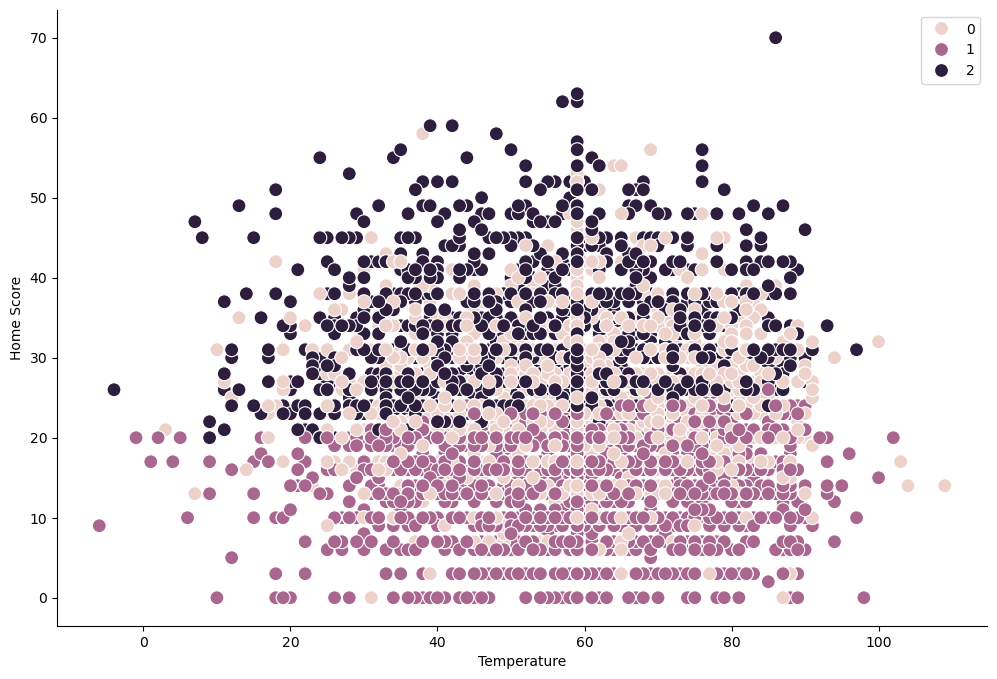

In [103]:
# Plot the clusters for Temperature and Home Score.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['temp'], y=numerical_df['home_score'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Temperature') 
plt.ylabel('Home Score') 
plt.show()

##### Regardless of temperature getting warmer or colder home scores tend to vary with each cluster.

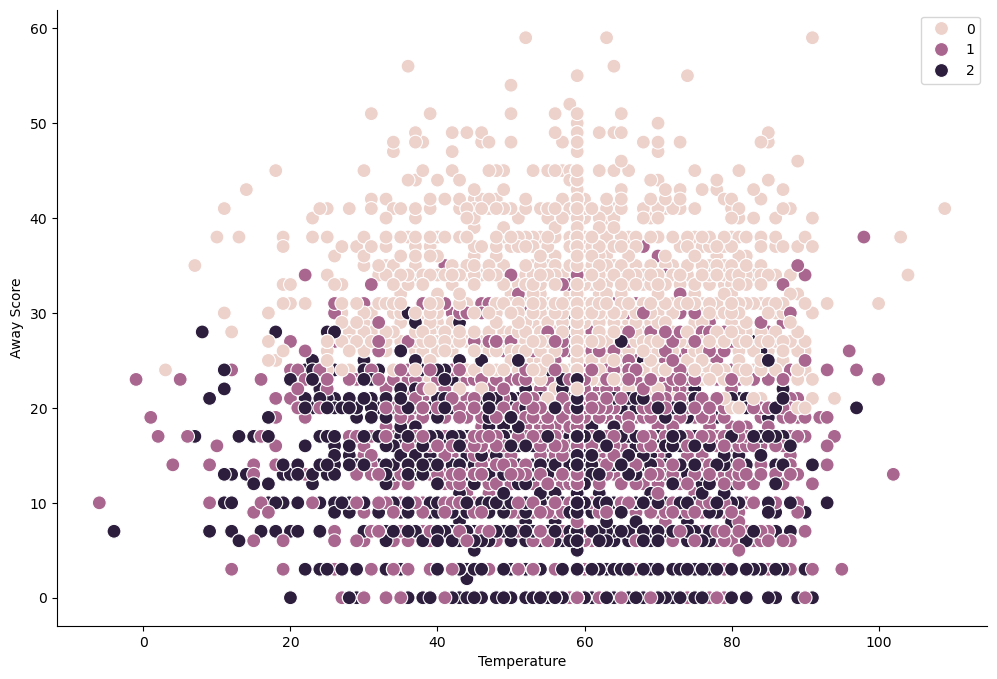

In [73]:
# Plot the clusters for Temperature and Away Score.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['temp'], y=numerical_df['away_score'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Temperature') 
plt.ylabel('Away Score') 
plt.show()

##### Regardless temperature getting warmer or colder the away team scores vary with each cluster.

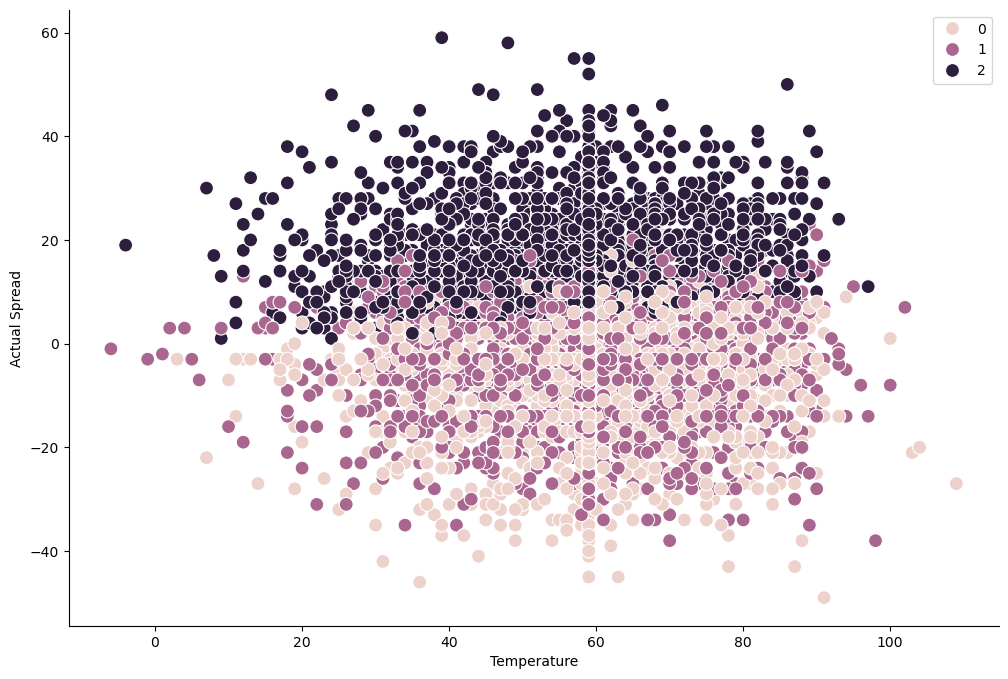

In [75]:
# Plot the clusters for Temperature and Actual Spread.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['temp'], y=numerical_df['actual_spread'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Temperature') 
plt.ylabel('Actual Spread') 
plt.show()

##### Regardless of temperature the actual spread varies with each cluster.

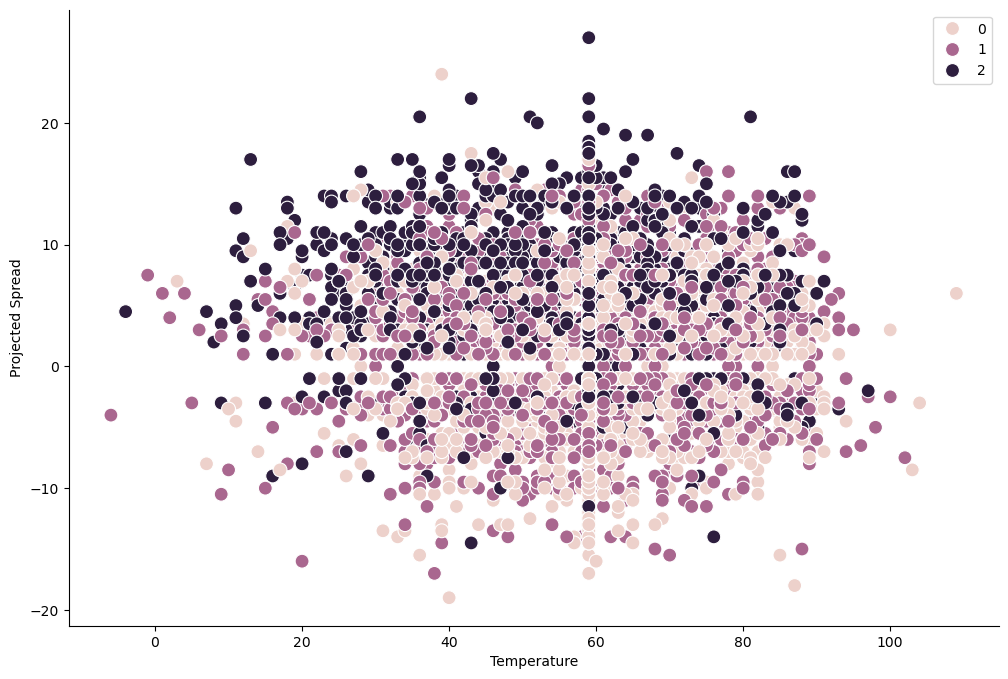

In [77]:
# Plot the clusters for Temperature and Projected Spread.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['temp'], y=numerical_df['projected_spread'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Temperature') 
plt.ylabel('Projected Spread') 
plt.show()

##### Regardless of temperature sportsbooks projected spreads for NFL games vary for each cluster and no signficant relationship between the two variables.

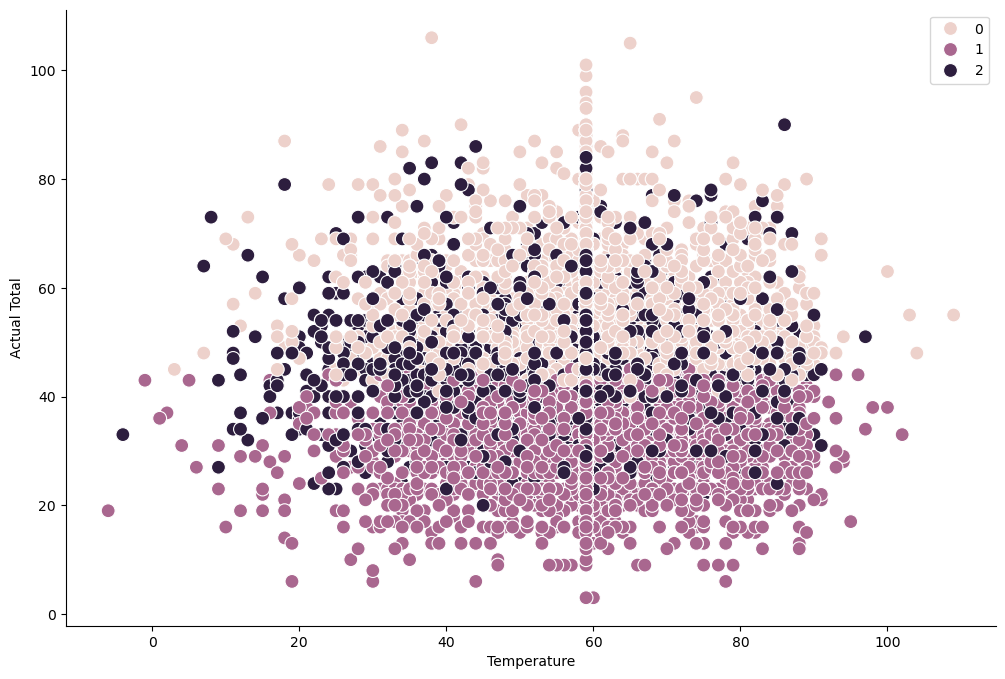

In [79]:
# Plot the clusters for Temperature and Actual Total.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['temp'], y=numerical_df['actual_total'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Temperature') 
plt.ylabel('Actual Total') 
plt.show()

##### Regardless of temperature the actual combined scores from both NFL teams vary with no sigficant relationship between these variables and the clusters.

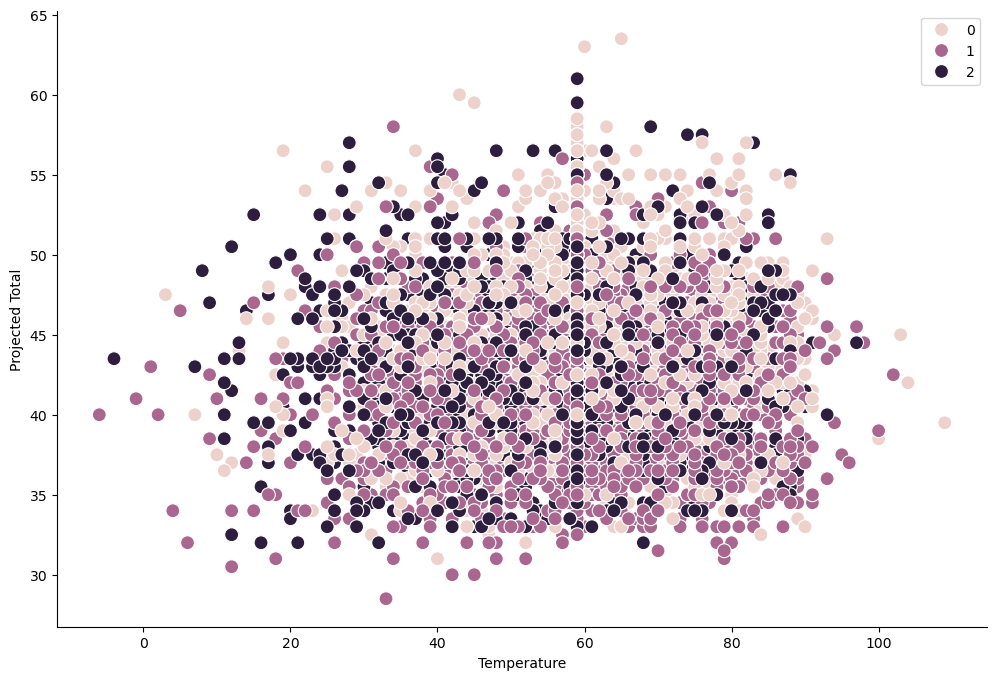

In [81]:
# Plot the clusters for Temperature and Projected Total.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['temp'], y=numerical_df['projected_total'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Temperature') 
plt.ylabel('Projected Total') 
plt.show()

##### Regardless of temperature the projected over & under varies and indicates there's no sigficant relationship between these two variables among the clusters.

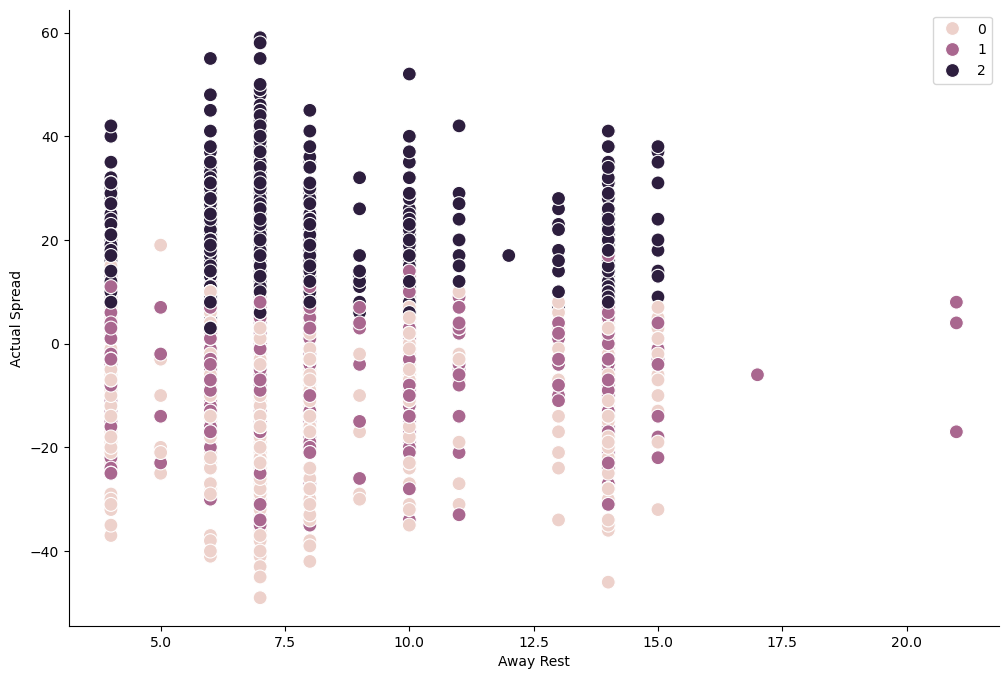

In [85]:
# Plot the clusters for Away Rest and Actual Spread.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['away_rest'], y=numerical_df['actual_spread'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Away Rest') 
plt.ylabel('Actual Spread') 
plt.show()

##### Regardless of rest time in between for away teams the actual spread varies which signfies no relationship between the two variables in the cluster groups.

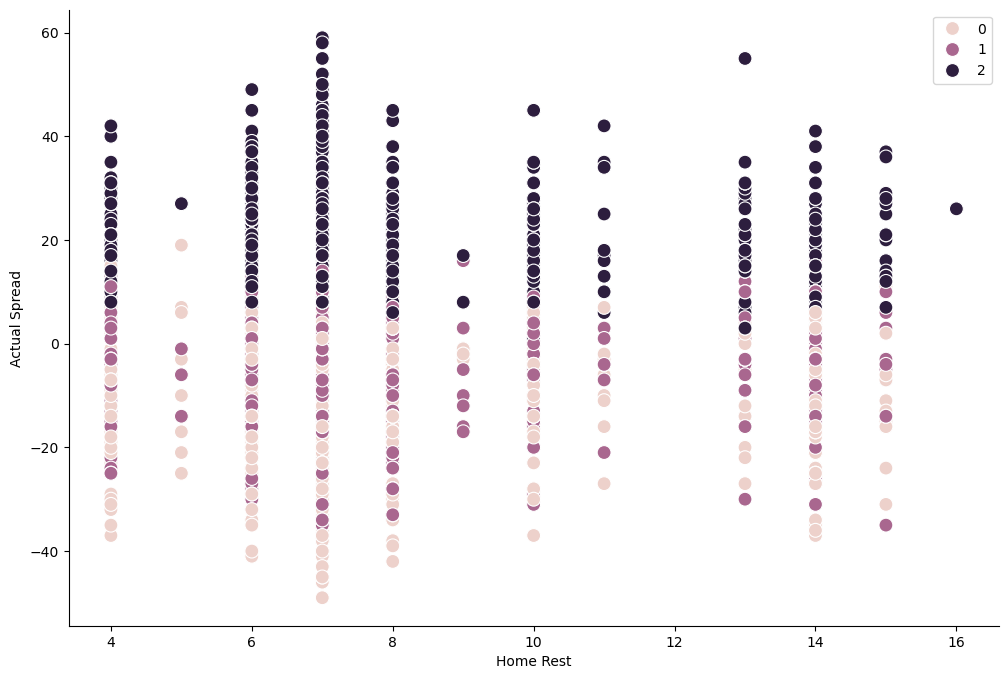

In [87]:
# Plot the clusters for Home Rest and Actual Spread.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['home_rest'], y=numerical_df['actual_spread'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Home Rest') 
plt.ylabel('Actual Spread') 
plt.show()

##### Regardless of restime for the home team in between games the actual spread varies which sigifies no relationship between these variables in the cluster groups.

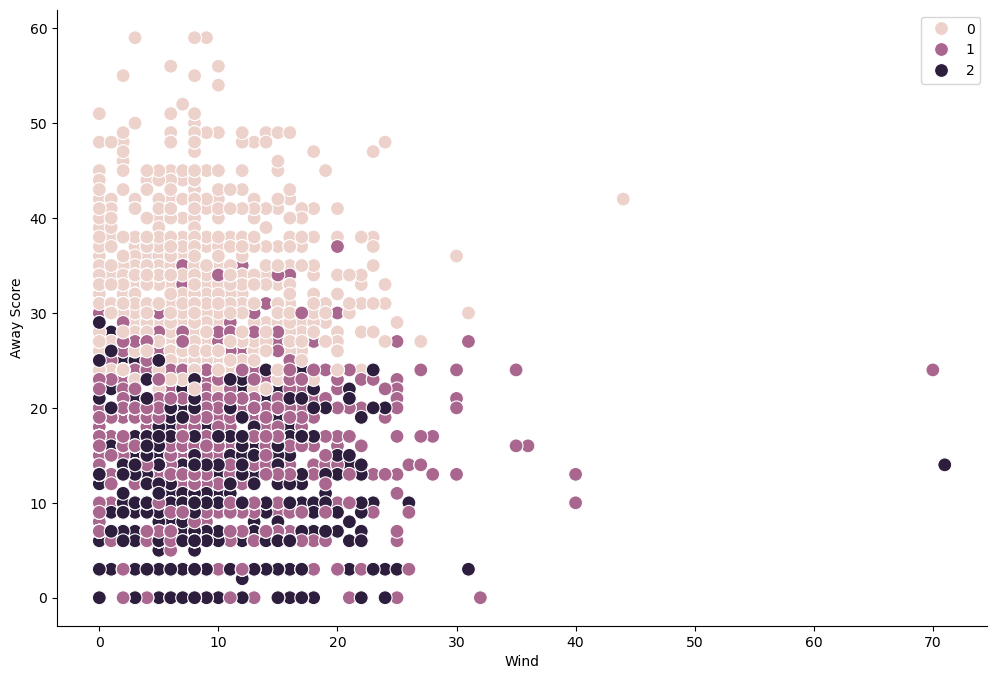

In [89]:
# Plot the clusters for Wind and Away Score.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['wind'], y=numerical_df['away_score'], hue=kmeans.labels_, s=100) 
ax.spines[['right', 'top']].set_visible(False)
ax.grid(False)
plt.xlabel('Wind') 
plt.ylabel('Away Score') 
plt.show()

##### Regardless of wind speed the points scored by away team vaires which signifies no relationship between these variables in the cluster groups.

In [95]:
numerical_df.loc[numerical_df['clusters'] == 2, 'cluster'] = 'dark purple'
numerical_df.loc[numerical_df['clusters'] == 1, 'cluster'] = 'purple'
numerical_df.loc[numerical_df['clusters'] == 0, 'cluster'] = 'pink'

In [99]:
numerical_df.groupby('cluster').agg({'temp':['mean', 'median'], 
                         'actual_spread':['mean', 'median'], 
                         'home_score':['mean', 'median'],
                          'actual_total':['mean', 'median'],
                          'wind': ['mean', 'median'],
                          'away_score': ['mean', 'median'],
                          'projected_total': ['mean', 'median'],
                          'projected_spread': ['mean', 'median'],
                          'home_rest': ['mean', 'median'], 
                          'away_rest': ['mean', 'median']})

temp        actual_spread        home_score         \
                  mean median          mean median       mean median   
cluster                                                                
dark purple  55.667879   59.0     18.875780   18.0  32.507796   31.0   
pink         59.114043   59.0     -6.371819   -4.0  25.356268   26.0   
purple       59.348496   59.0     -2.618797   -2.0  14.834586   16.0   

            actual_total             wind        away_score         \
                    mean median      mean median       mean median   
cluster                                                              
dark purple    46.139813   45.0  8.383576    8.0  13.632017   14.0   
pink           57.084354   55.0  8.010368    8.0  31.728087   31.0   
purple         32.287970   33.0  8.666541    8.0  17.453383   17.0   

            projected_total        projected_spread        home_rest         \
                       mean median             mean median      mean median   
cluster                                                                       
dark purple       43.768191   44.0         5.512734    6.0  7.624740    7.0   
pink              45.024270   45.0         0.636428    1.5  7.487747    7.0   
purple            41.985902   42.0         1.337218    2.5  7.475188    7.0   

            away_rest         
                 mean median  
cluster                       
dark purple  7.399688    7.0  
pink         7.504241    7.0  
purple       7.499624    7.0

### Further Analysis

##### Based on the kmeans cluster visuals it's clear that additional variables and datasets are needed to find more significant variables that NFL games outcomes along with sports betting.